In [111]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import RobustScaler

df=pd.read_csv("dataset1.csv")
df.shape

(21613, 22)

In [112]:
#dropping duplicates
df.drop_duplicates(inplace=True)
df.shape
df.head(2)

,id1,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,7129300520,20141013T000000,221900.0,3.0,1.00,1180,5650,1.0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,1,6414100192,20141209T000000,538000.0,3.0,2.25,2570,7242,2.0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639


In [113]:
#dropping the unecessary columns
df.drop(columns=['id1','id','waterfront','floors','condition','yr_built','date','yr_renovated','zipcode'],inplace=True)
df.head(2)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,view,grade,sqft_above,sqft_basement,lat,long,sqft_living15,sqft_lot15
0,221900.0,3.0,1.00,1180,5650,0,7,1180,0,47.5112,-122.257,1340,5650
1,538000.0,3.0,2.25,2570,7242,0,7,2170,400,47.7210,-122.319,1690,7639


In [114]:
#checking for null value

df.isna().sum()

price             0
bedrooms         13
bathrooms        10
sqft_living       0
sqft_lot          0
view              0
grade             0
sqft_above        0
sqft_basement     0
lat               0
long              0
sqft_living15     0
sqft_lot15        0
dtype: int64

In [115]:
#removing the null value from bedrooms and the bathrooms
imputer=SimpleImputer(strategy='mean')
imputer.fit(df[['bedrooms','bathrooms']])
imputer.statistics_


array([3.37287037, 2.11573624])

In [116]:
#fixing the null values with mean

df[['bedrooms','bathrooms']]=imputer.transform(df[['bedrooms','bathrooms']])

df.isna().sum() #checking the null value gone or not



price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
view             0
grade            0
sqft_above       0
sqft_basement    0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [117]:
df.head(2)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,view,grade,sqft_above,sqft_basement,lat,long,sqft_living15,sqft_lot15
0,221900.0,3.0,1.00,1180,5650,0,7,1180,0,47.5112,-122.257,1340,5650
1,538000.0,3.0,2.25,2570,7242,0,7,2170,400,47.7210,-122.319,1690,7639


In [118]:
#describe() is used to check there exists outliers or not
df.describe()


,price,bedrooms,bathrooms,sqft_living,sqft_lot,view,grade,sqft_above,sqft_basement,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.372870,2.115736,2079.899736,1.510697e+04,0.234303,7.656873,1788.390691,291.509045,47.560053,-122.213896,1986.552492,12768.455652
std,3.671272e+05,0.926378,0.768818,918.440897,4.142051e+04,0.766318,1.175459,828.090978,442.575043,0.138564,0.140828,685.391304,27304.179631
min,7.500000e+04,1.000000,0.500000,290.000000,5.200000e+02,0.000000,1.000000,290.000000,0.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,0.000000,7.000000,1190.000000,0.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,0.000000,7.000000,1560.000000,0.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,0.000000,8.000000,2210.000000,560.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,4.000000,13.000000,9410.000000,4820.000000,47.777600,-121.315000,6210.000000,871200.000000


In [119]:
df.corr()['price'].sort_values()

long             0.021626
sqft_lot15       0.082447
sqft_lot         0.089661
lat              0.307003
bedrooms         0.308797
sqft_basement    0.323816
view             0.397293
bathrooms        0.525738
sqft_living15    0.585379
sqft_above       0.605567
grade            0.667434
sqft_living      0.702035
price            1.000000
Name: price, dtype: float64

In [120]:
#box plot for identifying outliers
import seaborn as sns
import matplotlib.pyplot as plt


<Axes: ylabel='bedrooms'>

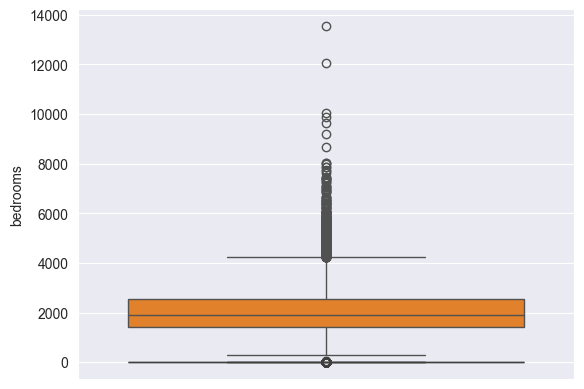

In [121]:
sns.set_style('darkgrid')
sns.boxplot(df,y='bedrooms') #outliers:yes
sns.boxplot(df,y='sqft_living') #outliers:yes

In [122]:
# interquartile range (IQR) method is mainly used for fixingoutliers ,
#defining Q1 and Q2

Q1_1=np.percentile(df['bedrooms'],25,interpolation='midpoint')
Q3_1=np.percentile(df['bedrooms'],75,interpolation='midpoint')

#IQR definition
IQR_1=Q3_1-Q1_1

#defining lowerbound and the upperbound

lowerbound_1=Q1_1-1.5*IQR_1
upperbound_1=Q3_1+1.5*IQR_1

df=df[(df.bedrooms<upperbound_1)&(df.bedrooms>lowerbound_1)]
df.shape


(21080, 13)

In [123]:

Q1_2=np.percentile(df['bathrooms'],25,interpolation='midpoint')
Q3_2=np.percentile(df['bathrooms'],75,interpolation='midpoint')
IQR_2=Q3_2-Q1_2

Q1_3=np.percentile(df['sqft_living'],25,interpolation='midpoint')
Q3_3=np.percentile(df['sqft_living'],75,interpolation='midpoint')
IQR_3=Q3_3-Q1_3

Q1_4=np.percentile(df['sqft_lot'],25,interpolation='midpoint')
Q3_4=np.percentile(df['sqft_lot'],75,interpolation='midpoint')
IQR_4=Q3_4-Q1_4

Q1_5=np.percentile(df['sqft_living15'],25,interpolation='midpoint')
Q3_5=np.percentile(df['sqft_living15'],75,interpolation='midpoint')
IQR_5=Q3_5-Q1_5

Q1_6=np.percentile(df['grade'],25,interpolation='midpoint')
Q3_6=np.percentile(df['grade'],75,interpolation='midpoint')
IQR_6=Q3_6-Q1_6

Q1_7=np.percentile(df['sqft_above'],25,interpolation='midpoint')
Q3_7=np.percentile(df['sqft_above'],75,interpolation='midpoint')
IQR_7=Q3_7-Q1_7




In [124]:
#DEFINING UPPER AND LOWER BOUND FOR BOTH

lowerbound_2=Q1_2-1.5*IQR_2
upperbound_2=Q3_2+1.5*IQR_2

lowerbound_3=Q1_3-1.5*IQR_3
upperbound_3=Q3_3+1.5*IQR_3

lowerbound_4=Q1_4-1.5*IQR_4
upperbound_4=Q3_4+1.5*IQR_4

lowerbound_5=Q1_5-1.5*IQR_5
upperbound_5=Q3_5+1.5*IQR_5

lowerbound_6=Q1_6-1.5*IQR_6
upperbound_6=Q3_6+1.5*IQR_6

lowerbound_7=Q1_7-1.5*IQR_7
upperbound_7=Q3_7+1.5*IQR_7



In [125]:
#removing outliers in both

df=df[(df.bathrooms<upperbound_2)&(df.bathrooms>lowerbound_2)]

df=df[(df.sqft_living<upperbound_3)&(df.sqft_living>lowerbound_3)]

df=df[(df.sqft_lot<upperbound_4)&(df.sqft_lot>lowerbound_4)]

df=df[(df.sqft_living15<upperbound_5)&(df.sqft_living15>lowerbound_5)]

df=df[(df.grade<upperbound_6)&(df.grade>lowerbound_6)]

df=df[(df.sqft_above<upperbound_7)&(df.sqft_above>lowerbound_7)]




In [126]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,view,grade,sqft_above,sqft_basement,lat,long,sqft_living15,sqft_lot15
count,1.722800e+04,17228.000000,17228.000000,17228.000000,17228.000000,17228.000000,17228.000000,17228.000000,17228.000000,17228.000000,17228.00000,17228.000000,17228.000000
mean,4.693460e+05,3.284615,1.997552,1868.760274,7174.315010,0.159798,7.425993,1603.311005,265.449269,47.560527,-122.23104,1835.398711,7201.026178
std,2.258517e+05,0.781813,0.652473,649.823400,3491.818585,0.616291,0.824138,601.431158,392.374791,0.139217,0.13135,527.798296,4382.028802
min,8.200000e+04,2.000000,0.750000,560.000000,520.000000,0.000000,6.000000,480.000000,0.000000,47.155900,-122.50900,460.000000,651.000000
25%,3.099375e+05,3.000000,1.500000,1370.000000,4800.000000,0.000000,7.000000,1150.000000,0.000000,47.469800,-122.33700,1440.000000,4886.000000
50%,4.249500e+05,3.000000,2.000000,1790.000000,7127.000000,0.000000,7.000000,1460.000000,0.000000,47.571400,-122.27000,1740.000000,7200.000000
75%,5.750000e+05,4.000000,2.500000,2290.000000,9137.250000,0.000000,8.000000,1940.000000,520.000000,47.680700,-122.15600,2160.000000,8850.250000
max,2.400000e+06,5.000000,3.500000,4170.000000,19017.000000,4.000000,9.000000,3691.000000,2050.000000,47.777600,-121.31900,3650.000000,196591.000000


In [127]:

#checking there exists any caterigical (object type or like that)

df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 17228 entries, 0 to 21612
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          17228 non-null  float64
 1   bedrooms       17228 non-null  float64
 2   bathrooms      17228 non-null  float64
 3   sqft_living    17228 non-null  int64  
 4   sqft_lot       17228 non-null  int64  
 5   view           17228 non-null  int64  
 6   grade          17228 non-null  int64  
 7   sqft_above     17228 non-null  int64  
 8   sqft_basement  17228 non-null  int64  
 9   lat            17228 non-null  float64
 10  long           17228 non-null  float64
 11  sqft_living15  17228 non-null  int64  
 12  sqft_lot15     17228 non-null  int64  
dtypes: float64(5), int64(8)
memory usage: 1.8 MB


In [128]:
model=LinearRegression()

Simple linear Regression-House price prediction 

In [129]:
X = df[['sqft_living']] 
y = df['price'] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model.fit(X_train, y_train)

y_pred1 = model.predict(X_test)

score = model.score(X_test, y_test)
print("Prediction Using Sqft_living")

df_finded = pd.DataFrame({
    'Actual_Values': y_test[:10],
    'Predicted_Values': y_pred1[:10]
})
print(df_finded)

print(f"Simple Linear Regression R^2 Score: {score}")




Prediction Using Sqft_living
       Actual_Values  Predicted_Values
7893        500000.0     537275.860183
19269       555000.0     556444.716608
1093        575000.0     650372.113090
2540        350000.0     364756.152359
9465        352000.0     585198.001245
10379       730000.0     500855.032976
67          287000.0     541109.631468
2022        329350.0     249743.013810
121         391500.0     389675.665712
12804       400000.0     355171.724147
Simple Linear Regression R^2 Score: 0.31736598786109693


In [130]:
X = df[['sqft_lot']] 
y = df['price'] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model.fit(X_train, y_train)

y_pred2 = model.predict(X_test)
score = model.score(X_test, y_test)
print("Prediction Using Sqft_lot")

df_finded = pd.DataFrame({
    'Actual_Values': y_test[:10],
    'Predicted_Values': y_pred2[:10]
})
print(df_finded)

print(f"Simple Linear Regression R^2 Score: {score}")



Prediction Using Sqft_lot
       Actual_Values  Predicted_Values
7893        500000.0     466371.347673
19269       555000.0     473812.687542
1093        575000.0     469660.867014
2540        350000.0     480026.224076
9465        352000.0     471477.732066
10379       730000.0     475090.170782
67          287000.0     474082.378448
2022        329350.0     470464.616886
121         391500.0     466126.496718
12804       400000.0     469128.582331
Simple Linear Regression R^2 Score: 0.0006006095086720231


In [131]:
X = df[['bedrooms']] 
y = df['price'] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model.fit(X_train, y_train)

y_pred3 = model.predict(X_test)

score = model.score(X_test, y_test)
print("Prediction  Using Bedrooms")

df_finded = pd.DataFrame({
    'Actual_Values': y_test[:10],
    'Predicted_Values': y_pred3[:10]
})
print(df_finded)

print(f"Simple Linear Regression R^2 Score: {score}")




Prediction  Using Bedrooms
       Actual_Values  Predicted_Values
7893        500000.0     448932.380097
19269       555000.0     520757.290564
1093        575000.0     520757.290564
2540        350000.0     448932.380097
9465        352000.0     520757.290564
10379       730000.0     520757.290564
67          287000.0     520757.290564
2022        329350.0     377107.469631
121         391500.0     448932.380097
12804       400000.0     377107.469631
Simple Linear Regression R^2 Score: 0.06350599714332483


In [132]:
X = df[['bathrooms']] 
y = df['price'] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model.fit(X_train, y_train)

y_pred4 = model.predict(X_test)

score = model.score(X_test, y_test)
print("Prediction Using Bathrooms")

df_finded = pd.DataFrame({
    'Actual_Values': y_test[:10],
    'Predicted_Values': y_pred4[:10]
})
print(df_finded)

print(f"Simple Linear Regression R^2 Score: {score}")



Prediction Using Bathrooms
       Actual_Values  Predicted_Values
7893        500000.0     407998.208271
19269       555000.0     439048.846804
1093        575000.0     407998.208271
2540        350000.0     470099.485337
9465        352000.0     532200.762403
10379       730000.0     532200.762403
67          287000.0     532200.762403
2022        329350.0     345896.931205
121         391500.0     470099.485337
12804       400000.0     345896.931205
Simple Linear Regression R^2 Score: 0.13042662238285585


In [133]:
X = df[['grade']] 
y = df['price'] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model.fit(X_train, y_train)

y_pred5 = model.predict(X_test)

score = model.score(X_test, y_test)
print("Prediction using Grade")

df_finded = pd.DataFrame({
    'Actual_Values': y_test[:10],
    'Predicted_Values': y_pred5[:10]
})
print(df_finded)

print(f"Simple Linear Regression R^2 Score: {score}")



Prediction using Grade
       Actual_Values  Predicted_Values
7893        500000.0     555590.001982
19269       555000.0     406568.824170
1093        575000.0     555590.001982
2540        350000.0     406568.824170
9465        352000.0     406568.824170
10379       730000.0     555590.001982
67          287000.0     406568.824170
2022        329350.0     257547.646358
121         391500.0     406568.824170
12804       400000.0     406568.824170
Simple Linear Regression R^2 Score: 0.29570628745341165


In [134]:
X = df[['long']] 
y = df['price'] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model.fit(X_train, y_train)

y_pred6 = model.predict(X_test)

score = model.score(X_test, y_test)
print("Prediction Using Longitude")

df_finded = pd.DataFrame({
    'Actual_Values': y_test[:10],
    'Predicted_Values': y_pred6[:10]
})
print(df_finded)

print(f"Simple Linear Regression R^2 Score: {score}")



Prediction Using Longitude
       Actual_Values  Predicted_Values
7893        500000.0     465159.724853
19269       555000.0     479692.085587
1093        575000.0     480972.138087
2540        350000.0     480520.354852
9465        352000.0     455747.574118
10379       730000.0     475626.036470
67          287000.0     471559.987352
2022        329350.0     479466.193969
121         391500.0     469225.773970
12804       400000.0     480219.166028
Simple Linear Regression R^2 Score: -0.0008119501156422793


In [135]:
X = df[['lat']] 
y = df['price'] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model.fit(X_train, y_train)

y_pred7 = model.predict(X_test)

score = model.score(X_test, y_test)
print("Prediction using latitude")

df_finded = pd.DataFrame({
    'Actual_Values': y_test[:10],
    'Predicted_Values': y_pred7[:10]
})
print(df_finded)

print(f"Simple Linear Regression R^2 Score: {score}")



Prediction using latitude
       Actual_Values  Predicted_Values
7893        500000.0     460360.287432
19269       555000.0     558974.753002
1093        575000.0     445012.543143
2540        350000.0     563558.242246
9465        352000.0     343620.205304
10379       730000.0     549252.200058
67          287000.0     314869.227314
2022        329350.0     566475.008129
121         391500.0     586406.241663
12804       400000.0     447304.287765
Simple Linear Regression R^2 Score: 0.1905944610434278


Conclusion

In [136]:
print("The feature Sqft_living is the best for  house price prediction using simple linear regression")

The feature Sqft_living is the best for  house price prediction using simple linear regression


Using multiple linear Regression

In [137]:

X=df.drop(columns=['price']) 
y=df['price'] 


In [138]:

scaler = MinMaxScaler()
scaler.fit(X)

X_scaled = scaler.transform(X)


In [139]:

X_scaled


array([[0.33333333, 0.09090909, 0.17174515, ..., 0.21176471, 0.27586207,
        0.02551291],
       [0.33333333, 0.54545455, 0.5567867 , ..., 0.15966387, 0.38557994,
        0.03566398],
       [0.        , 0.09090909, 0.05817175, ..., 0.23193277, 0.70846395,
        0.0378228 ],
       ...,
       [0.        , 0.        , 0.12742382, ..., 0.17647059, 0.17554859,
        0.00692049],
       [0.33333333, 0.63636364, 0.28808864, ..., 0.3697479 , 0.29780564,
        0.00324589],
       [0.        , 0.        , 0.12742382, ..., 0.17647059, 0.17554859,
        0.00360314]])

In [140]:
X_scaled_df=pd.DataFrame(X_scaled,columns=X.columns)  # Converting back to df for making the data retrivation easy
X_scaled_df

,bedrooms,bathrooms,sqft_living,sqft_lot,view,grade,sqft_above,sqft_basement,lat,long,sqft_living15,sqft_lot15
0,0.333333,0.090909,0.171745,0.277342,0.0,0.333333,0.218001,0.000000,0.571498,0.211765,0.275862,0.025513
1,0.333333,0.545455,0.556787,0.363410,0.0,0.333333,0.526316,0.195122,0.908959,0.159664,0.385580,0.035664
2,0.000000,0.090909,0.058172,0.512516,0.0,0.000000,0.090315,0.000000,0.936143,0.231933,0.708464,0.037823
3,0.666667,0.818182,0.387812,0.242201,0.0,0.333333,0.177515,0.443902,0.586939,0.097479,0.282132,0.022196
4,0.333333,0.454545,0.310249,0.408715,0.0,0.666667,0.373715,0.000000,0.741354,0.389916,0.420063,0.034970
...,...,...,...,...,...,...,...,...,...,...,...,...
17223,0.333333,0.636364,0.268698,0.033032,0.0,0.666667,0.327001,0.000000,0.874055,0.136975,0.335423,0.004379
17224,0.666667,0.636364,0.484765,0.286155,0.0,0.666667,0.569916,0.000000,0.570693,0.123529,0.429467,0.033423
17225,0.000000,0.000000,0.127424,0.044872,0.0,0.333333,0.168172,0.000000,0.705324,0.176471,0.175549,0.006920
17226,0.333333,0.636364,0.288089,0.100989,0.0,0.666667,0.348801,0.000000,0.608975,0.369748,0.297806,0.003246


In [141]:
# dividing the dataset for training and testing 

X_train,X_test,y_train,y_test=train_test_split(X_scaled_df,y,test_size=.2,random_state=42)  #random state 42 ittal constant ayirikum accuracy 


In [142]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((13782, 12), (3446, 12), (13782,), (3446,))

In [143]:
# Training the linear Regression Model

model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [144]:
# Making Predictions test data is used for prediction

y_predict=model.predict(X_test)

In [145]:
mean_absolute_error(y_test,y_predict) # large value obtained

100849.7571096924

In [146]:

df_finded = pd.DataFrame({
    'Actual_Values': y_test[:10],
    'Predicted_Values': y_predict[:10]
})
print(df_finded[1:])

       Actual_Values  Predicted_Values
19269       555000.0          563960.0
1093        575000.0          776048.0
2540        350000.0          462736.0
9465        352000.0          356568.0
10379       730000.0          601848.0
67          287000.0          353608.0
2022        329350.0          304208.0
121         391500.0          460536.0
12804       400000.0          347784.0
